In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math as mth
from random import *

import seaborn as sns
sns.set()

This is an implementation of the model of RNA production where molecules are made at a constant rate r. To compute the number of RNA molecules in a single cell as a function of time, we use the definition of a rate as the probability of RNA being produced during the time intervat $\Delta t$ being $r \Delta t$. 


*   Investigate the single-cell RNA dynamics when the average number of RNAs produced is small (say less then 10). 
*   Then look at trajectories in the case when the avergage number of RNAs is large (say a few hundred).

How are these two trajectories different? 

Compare the trajectories that you obain from the model to those that Golding and Co observed in their experiments. Is our model consistent with the experimental data? 

[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 4. 4. 4.]


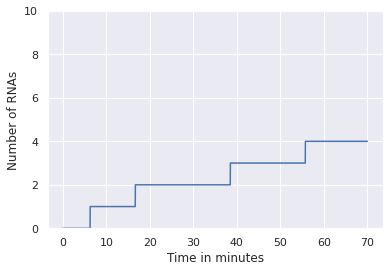

In [14]:
rate = 1/10 #Rate of production of RNA in molecules/minute. Try different rates!
Time = 70  #Generation time of the cell in minutes
deltaT = 0.01 #Time interval over which the probability of producing a single RNA molecule is examined (r deltaT << 1!)


Nint = int(Time/deltaT) # Number of time intervals at which an RNA is produced or not

RNA = np.zeros(Nint) # RNA[i] = 0 if no RNA is produced at interval i; RNA[i] = 1 RNA is produced

for i in range(Nint): 
  if random() < rate*deltaT: 
    RNA[i] = 1

print(RNA)

TotRNA = np.zeros(Nint)
time = np.zeros(Nint)

for i in range(1,Nint):
  TotRNA[i] = TotRNA[i-1] + RNA[i-1]
  time[i] = time[i-1] + deltaT

print(TotRNA) 
plt.plot(time, TotRNA)
plt.ylim(0,10) #You might need to change this when you play around with the rate of production
plt.xlabel('Time in minutes')
plt.ylabel('Number of RNAs')
plt.show()

Here we look at the distribution of the number of RNAs after a generation time has passed. The experiment is repeated Ntrials number of times (practically, one might examine that many different cells in a population; why might that be an issue?) and the results of every trial are histogramed. 

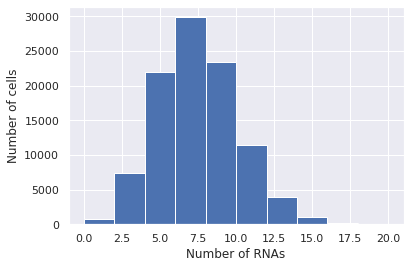

Mean number of RNAs =  6.98588
Standard deviation of the number of RNAs = 2.633837623241038


In [15]:
rate = 1/10 #Rate of production of RNA in molecules/minute. 
Time = 70  #Generation time of the cell in minutes
deltaT = .1 #Time interval over which the probability of producing a single RNA molecule is examined (r deltaT << 1!)


Nint = int(Time/deltaT) # Number of time intervals
Ntrials=100000

FinalRNA = np.zeros(Ntrials)

for trials in range(Ntrials):
  TotRNA = 0
  for i in range(1,Nint):
    if random() < rate*deltaT: 
       RNA = 1
    else:
       RNA = 0   
    TotRNA = TotRNA + RNA
  FinalRNA[trials] = TotRNA

#print(FinalRNA) 
plt.hist(FinalRNA)
plt.xlabel('Number of RNAs')
plt.ylabel('Number of cells')
plt.show()

print('Mean number of RNAs = ', np.mean(FinalRNA))
print('Standard deviation of the number of RNAs =', np.std(FinalRNA))

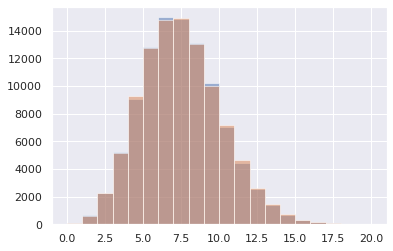

In [29]:
pois = np.random.poisson(7, 100000)
n=pois.max() - pois.min()
plt.hist(FinalRNA, bins=n, alpha=0.5)
plt.hist(pois, bins=n, alpha=0.5)
plt.show()